## Development notebook  FCN model 

Evaluate returned heatmap values from FCN, by passing data through MRCNN and then through FCN

In [1]:
# np_format = {}
# float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
# np_format['float'] = float_formatter
# np_format['int']   = int_formatter
# np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, math, io, time, gc, argparse, platform, pprint
import numpy as np
import tensorflow as tf
import keras
import keras.backend as KB
sys.path.append('../')
import mrcnn.visualize    as visualize
import mrcnn.utils        as utils

from datetime            import datetime   
from mrcnn.utils         import command_line_parser, Paths
from mrcnn.config        import Config
from mrcnn.dataset       import Dataset 
from mrcnn.prep_notebook import mrcnn_newshape_train, build_fcn_training_pipeline_newshapes
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.datagen       import data_gen_simulate

pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = command_line_parser()
input_parms = " --epochs          2 "
input_parms +=" --steps_in_epoch 10 " 
input_parms +=" --val_steps       2 " 
input_parms +=" --last_epoch      0 "
input_parms +=" --batch_size      1 "
input_parms +=" --lr        0.0000001 "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +=" --fcn_logs_dir   train_fcn32_newshapes "
# input_parms +="--fcn_logs_dir   train_fcn8_newshapes "
input_parms +=" --scale_factor     1 " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            SGD "
input_parms +=" --fcn_arch       fcn8 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout        screen "
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
# utils.display_input_parms(args)

Using TensorFlow backend.


In [3]:
mrcnn_model, fcn_model = build_fcn_training_pipeline_newshapes(args = args, verbose = 1)


--> Execution started at: 12-22-2018 @ 18:57:18
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         2
   fcn_arch                       FCN8
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn32_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0000001
   mrcnn_exclude_layers           None
   mrcnn_layers                   mrcnn fpn rpn 
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            SGD
   scale_factor                   1
   steps_in_epoch                 10
   sysout                         SCREEN
   val_steps                      2



   Arguments passed :


    FCN Block 51                   :  shape: (?, 8, 8, 512)        KB.shape:(None, 8, 8, 512)     Keras Tensor: True
    FCN Block 52                   :  shape: (?, 8, 8, 512)        KB.shape:(None, 8, 8, 512)     Keras Tensor: True
    FCN Block 53                   :  shape: (?, 8, 8, 512)        KB.shape:(None, 8, 8, 512)     Keras Tensor: True
    FCN Block 54 (Max pooling)     :  shape: (?, 4, 4, 512)        KB.shape:(None, 4, 4, 512)     Keras Tensor: True

   --- FCN32 ----------------------------
    FCN fully connected 1 (fc1)    :  shape: (?, 4, 4, 4096)       KB.shape:(None, 4, 4, 4096)    Keras Tensor: True
***** Call to Dropout Layer : Training is :  None
***** in_train_phase() : Use_learning_phase:  True
    FCN fully connected 2 (fc2)    :  shape: (?, 4, 4, 4096)       KB.shape:(None, 4, 4, 4096)    Keras Tensor: True
***** Call to Dropout Layer : Training is :  None
***** in_train_phase() : Use_learning_phase:  True
    FCN conv2d (fcn32_deconv2D)    :  shape: (?, 4, 4

    target_masks : (?, 128, 128, 7) (None, 128, 128, 7) KerasTensor:  True
    pred_heatmap : (?, 128, 128, 7) (None, 128, 128, 7) KerasTensor:  True
    loss         : (?, 128, 128) (None, 128, 128) KerasTensor:  False
    loss mean    : () () KerasTensor:  False
    loss final   : (1, 1) (1, 1) KerasTensor:  False

-------------------------------
>>> fcn_heatmap_MSE_loss_graph 
-------------------------------
    target_masks : (?, 128, 128, 7) (None, 128, 128, 7) KerasTensor:  False
    pred_heatmap : (?, 128, 128, 7) (None, 128, 128, 7) KerasTensor:  False
    loss         : (?, 128, 128) (None, 128, 128) KerasTensor:  False
    loss mean    : () () KerasTensor:  False
    loss final   : (1, 1) (1, 1) KerasTensor:  False

-------------------------------
>>> fcn_heatmap_CE_loss_graph  
-------------------------------
    target_class_ids  : (None, 128, 128, 7)
    pred_class_logits : (None, 128, 128, 7)
    active_class_ids  : (None, 7)
    pred_class_ids    : (None, 128, 128) <dtyp

#### load model weights

In [ ]:
##------------------------------------------------------------------------------------
## Load MRCNN Model weights  
##------------------------------------------------------------------------------------
# exclude=["mrcnn_class_logits"] # ,"mrcnn_bbox_fc"]   #, "mrcnn_bbox", "mrcnn_mask"])
# mrcnn_model.load_model_weights(init_with = 'last', exclude = None)  

##------------------------------------------------------------------------------------
## Load FCN Model weights  
##------------------------------------------------------------------------------------
# WEIGHTS_PATH = '/home/kbardool/models/train_fcn8_coco/fcn20181031T0000/fcn_0106.h5'
# fcn_model.load_model_weights(init_with = WEIGHTS_PATH) # 'fcn_config.VGG16_MODEL_PATH')

#### display fcn_config

In [ ]:
# mrcnn_model.config.EPOCHS_TO_RUN = 1
fcn_model.config.display()  
# mrcnn_model.layer_info()

##  Build FCN Model (obsolete)

In [ ]:
##----------------------------------------------------------------------------------------------
## if debug is true set stdout destination to stringIO
##----------------------------------------------------------------------------------------------            
# debug = False
if args.sysout == 'FILE':
    sys.stdout = io.StringIO()

# print("    Dataset            : ", args.dataset)
# print("    Logs               : ", args.logs)
# print("    Limit              : ", args.limit)
print("    MRCNN Model        : ", args.mrcnn_model)
print("    FCN Model          : ", args.fcn_model)
print("    MRCNN Log Dir      : ", args.mrcnn_logs_dir)
print("    FCN Log Dir        : ", args.fcn_logs_dir)
print("    FCN Arch           : ", args.fcn_arch)
print("    FCN Log Dir        : ", args.fcn_layers)
print("    Last Epoch         : ", args.last_epoch)
print("    Epochs to run      : ", args.epochs)
print("    Steps in each epoch: ", args.steps_in_epoch)
print("    Validation steps   : ", args.val_steps)
print("    Batch Size         : ", args.batch_size)
print("    Optimizer          : ", args.opt)
print("    sysout             : ", args.sysout)
# print("    OS Platform        : ", syst)

##------------------------------------------------------------------------------------
## setup project directories
##   ROOT_DIR         : Root directory of the project 
##   MODEL_DIR        : Directory to save logs and trained model
##   COCO_MODEL_PATH  : Path to COCO trained weights
##---------------------------------------------------------------------------------
paths = Paths(fcn_training_folder = args.fcn_logs_dir, mrcnn_training_folder = args.mrcnn_logs_dir)
paths.display()

##------------------------------------------------------------------------------------
## Build configuration object 
##------------------------------------------------------------------------------------                          
mrcnn_config                    = CocoConfig()
# import mrcnn.new_shapes as new_shapes
# mrcnn_config = new_shapes.NewShapesConfig()

mrcnn_config.NAME               = 'mrcnn'              
mrcnn_config.TRAINING_PATH      = paths.MRCNN_TRAINING_PATH
mrcnn_config.COCO_DATASET_PATH  = paths.COCO_DATASET_PATH 
mrcnn_config.COCO_MODEL_PATH    = paths.COCO_MODEL_PATH   
mrcnn_config.RESNET_MODEL_PATH  = paths.RESNET_MODEL_PATH 
mrcnn_config.VGG16_MODEL_PATH   = paths.VGG16_MODEL_PATH  
mrcnn_config.COCO_CLASSES       = None 
mrcnn_config.DETECTION_PER_CLASS = 200
mrcnn_config.HEATMAP_SCALE_FACTOR = 4
mrcnn_config.BATCH_SIZE         = int(args.batch_size)                  # Batch size is 2 (# GPUs * images/GPU).
mrcnn_config.IMAGES_PER_GPU     = int(args.batch_size)                  # Must match BATCH_SIZE

mrcnn_config.STEPS_PER_EPOCH    = int(args.steps_in_epoch)
mrcnn_config.LEARNING_RATE      = float(args.lr)
mrcnn_config.EPOCHS_TO_RUN      = int(args.epochs)
mrcnn_config.FCN_INPUT_SHAPE    = mrcnn_config.IMAGE_SHAPE[0:2]
mrcnn_config.LAST_EPOCH_RAN     = int(args.last_epoch)

mrcnn_config.WEIGHT_DECAY       = 2.0e-4
mrcnn_config.VALIDATION_STEPS   = int(args.val_steps)
mrcnn_config.REDUCE_LR_FACTOR   = 0.5
mrcnn_config.REDUCE_LR_COOLDOWN = 30
mrcnn_config.REDUCE_LR_PATIENCE = 40
mrcnn_config.EARLY_STOP_PATIENCE= 80
mrcnn_config.EARLY_STOP_MIN_DELTA = 1.0e-4
mrcnn_config.MIN_LR             = 1.0e-10
mrcnn_config.OPTIMIZER          = args.opt.upper()
mrcnn_config.NEW_LOG_FOLDER       = True
mrcnn_config.SYSOUT               = args.sysout
mrcnn_config.display() 


###  Build Model

from mrcnn.prep_notebook import mrcnn_coco_train
mrcnn_model, mrcnn_config = mrcnn_coco_train(mode = 'trainfcn', mrcnn_config = mrcnn_config)

In [ ]:
##------------------------------------------------------------------------------------
## Build configuration for FCN model
##------------------------------------------------------------------------------------
# fcn_config = CocoConfig()
# fcn_config.NAME                 = 'fcn'              
# fcn_config.TRAINING_PATH        = paths.FCN_TRAINING_PATH
# fcn_config.VGG16_MODEL_PATH     = paths.FCN_VGG16_MODEL_PATH
# fcn_config.FCN_INPUT_SHAPE      = mrcnn_config.IMAGE_SHAPE[0:2] // mrcnn_config.HEATMAP_SCALE_FACTOR 

# fcn_config.BATCH_SIZE           = int(args.batch_size)                  # Batch size is 2 (# GPUs * images/GPU).
# fcn_config.IMAGES_PER_GPU       = int(args.batch_size)                  # Must match BATCH_SIZE
# fcn_config.EPOCHS_TO_RUN        = int(args.epochs)
# fcn_config.STEPS_PER_EPOCH      = int(args.steps_in_epoch)
# fcn_config.LEARNING_RATE        = float(args.lr)
# fcn_config.LAST_EPOCH_RAN       = int(args.last_epoch)
# fcn_config.VALIDATION_STEPS     = int(args.val_steps)

# fcn_config.WEIGHT_DECAY         = 2.0e-4     ## FCN Weight decays are 5.0e-4 or 2.0e-4
# fcn_config.BATCH_MOMENTUM       = 0.9

# fcn_config.REDUCE_LR_FACTOR     = 0.5
# fcn_config.REDUCE_LR_COOLDOWN   = 15
# fcn_config.REDUCE_LR_PATIENCE   = 50
# fcn_config.REDUCE_LR_MIN_DELTA  = 1e-6

# fcn_config.EARLY_STOP_PATIENCE  = 75
# fcn_config.EARLY_STOP_MIN_DELTA = 1.0e-7

# fcn_config.MIN_LR               = 1.0e-10
# fcn_config.CHECKPOINT_PERIOD    = 1

# fcn_config.NEW_LOG_FOLDER       = args.new_log_folder
# fcn_config.OPTIMIZER            = args.opt.upper()
# fcn_config.SYSOUT               = args.sysout
# fcn_config.display()

#### Build Model

In [ ]:
##------------------------------------------------------------------------------------
## Build FCN Model in Training Mode
##------------------------------------------------------------------------------------
# try :
#     del fcn_model
#     gc.collect()
# except: 
#     pass    
# fcn_model = fcn_modellib.FCN(mode="training", arch = 'FCN8', config=fcn_config)


In [ ]:
fcn_model.keras_model.summary()
fcn_model.layer_info()
# fcn_model.config.display()

In [ ]:
# del fcn_m
ff = fcn_model.keras_model
# pp.pprint(dir(ff))
# for i in ff.layers:
#     print(i.name)
ly = ff.layers[35]
dir(ly)
print(ly.input, ly.input_shape)
print(ly.output, ly.output_shape)
# test = [None] *len(fcn_m.targets)

print('ff.outputNames', ff.output_names)
print('ff.outputShapes', ff.output_shape)

print('ff.targets :', len(ff.targets))
for tensor in ff.targets:
      print('  ', tensor)
print('ff.inputs  :', len(ff.inputs))
for tensor in ff.inputs:
      print('   ', tensor)
print('fd.sample_weights :', ff.sample_weights)
print('ff.input          :', len(ff.input))
print('_feed_input_nmes: ', ff._feed_input_names)
print('_feed_output_nmes: ', ff._feed_output_names)

## Load datasets

In [4]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
dataset_train, train_generator = prep_newshape_dataset( mrcnn_model.config, 1000, generator=True)
dataset_val  , val_generator   = prep_newshape_dataset( mrcnn_model.config,  250, generator=True)
class_names = dataset_train.class_names
print(len(dataset_train.image_ids), len(dataset_val.image_ids))

Prepares complete
Prepares complete
1000 250


In [5]:
# dataset_train.display_active_classes()
# dataset_val.display_active_classes()
print(len(dataset_train.image_ids), len(dataset_val.image_ids))
ext_ids = [img_inf['id'] for img_inf in dataset_train.image_info]
print(len(ext_ids))
ext_ids.index(999)

1000 250
1000


999

## Display Images

###  Display image with Ground Truth bounding boxes and masks

image id :  646
 Image_id    :  646  Reference:  [('sun', (152, 41, 73), (14, 11, 5, 5)), ('cloud', (96, 179, 91), (58, 20, 15, 3)), ('cloud', (88, 204, 208), (92, 29, 33, 6)), ('tree', (173, 225, 40), (67, 67, 14, 14)), ('building', (153, 242, 11), (82, 78, 18, 26)), ('car', (53, 247, 132), (94, 85, 22, 11)), ('person', (245, 77, 188), (96, 86, 3, 15)), ('tree', (91, 152, 203), (21, 90, 19, 19))] Coco Id: 646
 Image meta  :  [646 128 128   3   0   0 128 128]
 Class ids   :  (8,)    [3 6 6 5 4 2 1 5]
 Class Names :  ['sun', 'cloud', 'cloud', 'tree', 'building', 'car', 'person', 'tree']


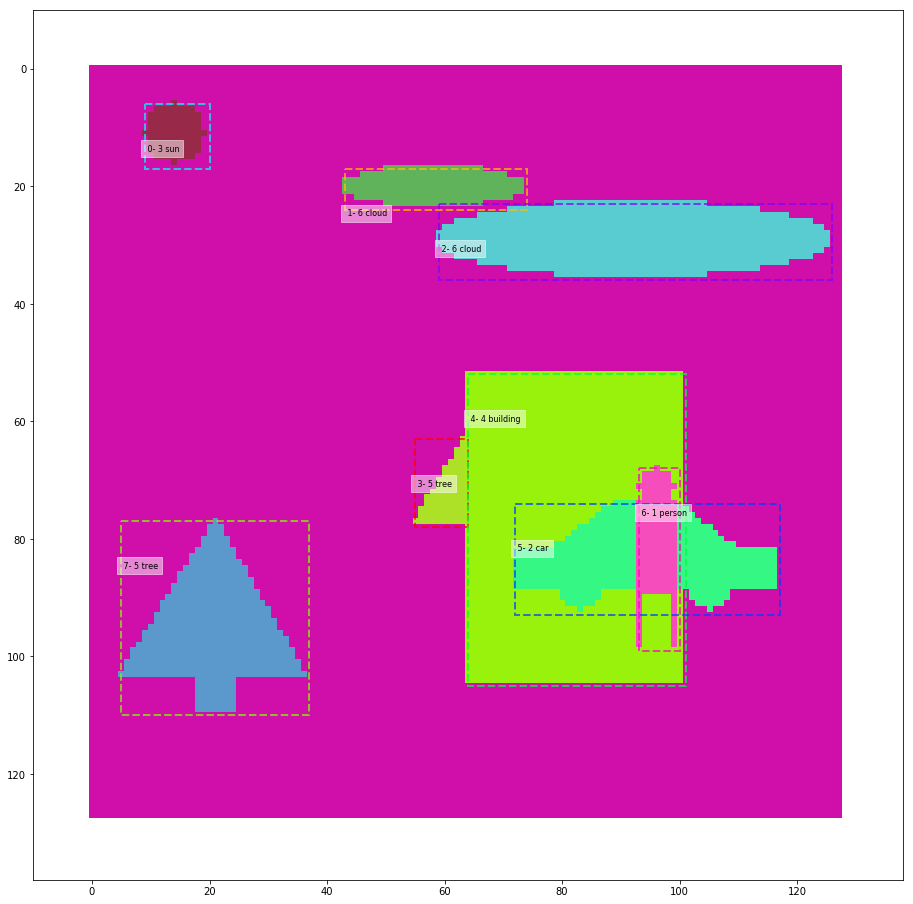

[646 128 128   3   0   0 128 128   1   1   1   1   1   1   1]


In [6]:
IMAGE_IDS = [646]
# train_batch_x, train_batch_y = next(train_generator)
train_batch_x, train_batch_y = data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_IDS)
visualize.display_training_batch(dataset_train, train_batch_x)
print(train_batch_x[1][0])

### other image displays

####  Display Training / Validation Training set information

In [ ]:
print("Train Dataset Image Count: {}".format(len(dataset_train.image_ids)))
print("Training Dataset Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))
    
    
print("Validation Dataset Image Count: {}".format(len(dataset_val.image_ids)))
print("Validation Dataset Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
    print("{:3}. {:50}".format(i, info['name']))    

#### Display top masks for a random group of images

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 7)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

#### Display a random image with instances and mask

In [ ]:
# Load random image and mask.
# image_id = np.random.choice(dataset_train.image_ids)


image    = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_train.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)

## FCN `train_in_batches()`

#### setup datasets

 #### Display parameters

In [7]:
from mrcnn.utils        import log
# fcn_config.EPOCHS_TO_RUN  = 4
# fcn_config.LEARNING_RATE  = 0.1
fcn_model.config.VALIDATION_STEPS = 4
fcn_model.config.display()
print('--- MRCNN-------------------------------------------------------')
log("Epochs to run       {} ".format(mrcnn_model.config.EPOCHS_TO_RUN))
log("Steps per epochs    {} ".format(mrcnn_model.config.STEPS_PER_EPOCH))
log("Batch size          {} ".format(mrcnn_model.config.BATCH_SIZE))
log("Learning Rate       {} ".format(mrcnn_model.config.LEARNING_RATE))
log("Momentum            {} ".format(mrcnn_model.config.LEARNING_MOMENTUM))
log("Weight Decay:       {} ".format(mrcnn_model.config.WEIGHT_DECAY       ))
log("VALIDATION_STEPS    {} ".format(mrcnn_model.config.VALIDATION_STEPS   ))
# log("Checkpoint Path:    {} ".format(mrcnn_model.checkpoint_path))
# log("REDUCE_LR_FACTOR    {} ".format(mrcnn_model.config.REDUCE_LR_FACTOR   ))
# log("REDUCE_LR_COOLDOWN  {} ".format(mrcnn_model.config.REDUCE_LR_COOLDOWN ))
# log("REDUCE_LR_PATIENCE  {} ".format(mrcnn_model.config.REDUCE_LR_PATIENCE ))
# log("MIN_LR              {} ".format(mrcnn_model.config.MIN_LR             ))
# log("EARLY_STOP_PATIENCE {} ".format(mrcnn_model.config.EARLY_STOP_PATIENCE))     

print('--- FCN --------------------------------------------------------')
log("Epochs to run       {} ".format(fcn_model.config.EPOCHS_TO_RUN))
log("Steps per epochs    {} ".format(fcn_model.config.STEPS_PER_EPOCH))
log("Batch size          {} ".format(fcn_model.config.BATCH_SIZE))
log("Learning Rate       {} ".format(fcn_model.config.LEARNING_RATE))
log("Momentum            {} ".format(fcn_model.config.LEARNING_MOMENTUM))
log("Weight Decay:       {} ".format(fcn_model.config.WEIGHT_DECAY       ))
log("VALIDATION_STEPS    {} ".format(fcn_model.config.VALIDATION_STEPS   ))
log("Checkpoint Path:    {} ".format(fcn_model.checkpoint_path))
log("REDUCE_LR_FACTOR    {} ".format(fcn_model.config.REDUCE_LR_FACTOR   ))
log("REDUCE_LR_COOLDOWN  {} ".format(fcn_model.config.REDUCE_LR_COOLDOWN ))
log("REDUCE_LR_PATIENCE  {} ".format(fcn_model.config.REDUCE_LR_PATIENCE ))
log("MIN_LR              {} ".format(fcn_model.config.MIN_LR             ))
log("EARLY_STOP_PATIENCE {} ".format(fcn_model.config.EARLY_STOP_PATIENCE)) 
log("HEATMAP SCALE FACOR {} ".format(fcn_model.config.HEATMAP_SCALE_FACTOR)) 
log("FCN_INPUT_SHAPE     {} ".format(fcn_model.config.FCN_INPUT_SHAPE)) 


Configuration Parameters:
-------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_MOMENTUM                 0.9
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CHECKPOINT_PERIOD              1
COCO_DATASET_PATH              F:\MLDatasets\coco2014
COCO_MODEL_PATH                F:\PretrainedModels\mask_rcnn_coco.h5
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            200
EARLY_STOP_MIN_DELTA           1e-07
EARLY_STOP_PATIENCE            150
EPOCHS_TO_RUN                  2
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
HEATMAP_SCALE_FACTOR           1
IMAGES_PER_GPU                 1
IMAGE_BUFFER                   20
IMAGE_MAX_DIM                  128
IMAGE_MIN_DIM                  128
IMAGE_PADDING                  True
IMAGE_SHAPE           

## Simulate Train in Batches - step by step

#### Prepare model (compile / callbacks)

In [8]:
# def train_in_batches(self,
#                 mrcnn_model,
#               train_dataset, 
#               val_dataset,  
#               layers            = None,
#               losses            = None,
train_layers      = ['block2+']
loss_names        = ["fcn_BCE_loss"]
# train_in_batches(fcn_model,
#             mrcnn_model,    
#             dataset_train,
#             dataset_val, 
#             layers = train_layers,
#             losses = loss_names
#             )
fcn_model.epoch   = fcn_model.config.LAST_EPOCH_RAN = 0
self              = fcn_model
mrcnn_model       = mrcnn_model
train_dataset     = dataset_train
val_dataset       = dataset_val
layers            = train_layers
losses            = loss_names
learning_rate     = 0           
epochs            = 0
epochs_to_run     = 0 
batch_size        = 0 
steps_per_epoch   = 0
min_LR            = 0
debug             = False

'''
Train the model.
train_dataset, 
val_dataset:    Training and validation Dataset objects.

learning_rate:  The learning rate to train with

epochs:         Number of training epochs. Note that previous training epochs
                are considered to be done already, so this actually determines
                the epochs to train in total rather than in this particaular
                call.

layers:         Allows selecting wich layers to train. It can be:
                - A regular expression to match layer names to train
                - One of these predefined values:
                heads: The RPN, classifier and mask heads of the network
                all: All the layers
                3+: Train Resnet stage 3 and up
                4+: Train Resnet stage 4 and up
                5+: Train Resnet stage 5 and up
'''
assert self.mode == "training", "Create model in training mode."

if batch_size == 0 :
    batch_size = self.config.BATCH_SIZE

if epochs_to_run ==  0 :
    epochs_to_run = self.config.EPOCHS_TO_RUN

if steps_per_epoch == 0:
    steps_per_epoch = self.config.STEPS_PER_EPOCH

if min_LR == 0 :
    min_LR = self.config.MIN_LR

if learning_rate == 0:
    learning_rate = self.config.LEARNING_RATE

epochs = self.epoch + epochs_to_run

# use Pre-defined layer regular expressions
# if layers in self.layer_regex.keys():
    # layers = self.layer_regex[layers]
print(layers)
# train_regex_list = []
# for x in layers:
    # print( ' layers ias : ',x)
    # train_regex_list.append(x)
train_regex_list = [self.layer_regex[x] for x in layers]
print(train_regex_list)
layers = '|'.join(train_regex_list)        
print('layers regex :', layers)


##--------------------------------------------------------------------------------
## Data generators
##--------------------------------------------------------------------------------
# train_generator = data_generator(train_dataset, mrcnn_model.config, shuffle=True,
#                                  batch_size=batch_size)
# val_generator   = data_generator(val_dataset, mrcnn_model.config, shuffle=True,
#                                  batch_size=batch_size,
#                                  augment=False)

##--------------------------------------------------------------------------------
## Set trainable layers and compile
##--------------------------------------------------------------------------------
self.set_trainable(layers)            

##----------------------------------------------------------------------------------------------
## Setup optimizaion method 
##----------------------------------------------------------------------------------------------            
optimizer = self.set_optimizer()

# self.compile(learning_rate, self.config.LEARNING_MOMENTUM, losses)        
self.compile(losses, optimizer)

##--------------------------------------------------------------------------------
## get metrics from keras_model.metrics_names and setup callback metrics 
##--------------------------------------------------------------------------------
out_labels = self.get_deduped_metrics_names()
callback_metrics = out_labels + ['val_' + n for n in out_labels]

print()
print(' Post-compile out_labels from get_deduped_metrics_names() : ')
print(' ---------------------------------------------------------- ')
for i in out_labels:
    print('     -',i)
print()
print(' Post-compile Callback metrics monitored by progbar :')
print(' ----------------------------------------------------')
for i in callback_metrics:
    print('     -',i)

print()
print(' Post-compile Keras metric_names :') 
print(' ---------------------------------') 
for idx, i in enumerate(self.keras_model.metrics_names):
    print('     ',idx, '  ', i)

print()
print(' Post-compile Keras stateful_metric_names :') 
print(' ------------------------------------------') 
for idx, i in enumerate(self.keras_model.stateful_metric_names):
    print('     ',idx, '  ', i)
print(' ------------------------------------------') 

## Setup for stateful_metric_indices Validation process 
##--------------------------------------------------------------------------------
stateful_metric_indices = []
if hasattr(self, 'metrics'):
    for m in self.stateful_metric_functions:
        m.reset_states()
    stateful_metric_indices = [
        i for i, name in enumerate(self.metrics_names)
        if str(name) in self.stateful_metric_names]
else:
    stateful_metric_indices = []

##--------------------------------------------------------------------------------
## Callbacks
##--------------------------------------------------------------------------------
# call back for model checkpoint was originally (?) loss. chanegd to val_loss (which is default) 2-5-18
# copied from \keras\engine\training.py
# def _get_deduped_metrics_names(self):


callbacks_list = [
      keras.callbacks.ProgbarLogger(count_mode='steps',
                                    stateful_metrics=self.keras_model.stateful_metric_names)

    , keras.callbacks.BaseLogger(stateful_metrics=self.keras_model.stateful_metric_names)

    , keras.callbacks.TensorBoard(log_dir=self.log_dir,
                                  histogram_freq=1,
                                  write_graph=True,
                                  write_images=False, 
                                  write_grads=True,
                                  batch_size=self.config.BATCH_SIZE)
                                  # write_graph=True,

                                  # write_images=True,
                                  # embeddings_freq=0,
                                  # embeddings_layer_names=None,
                                  # embeddings_metadata=None)

    , keras.callbacks.ModelCheckpoint(self.checkpoint_path, 
                                      mode    = 'auto', 
                                      period  = self.config.CHECKPOINT_PERIOD, 
                                      monitor = 'val_loss', 
                                      verbose = 1, 
                                      save_best_only = True, 
                                      save_weights_only=True)

    , keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                        mode     = 'auto', 
                                        factor   = self.config.REDUCE_LR_FACTOR,   
                                        cooldown = self.config.REDUCE_LR_COOLDOWN,
                                        patience = self.config.REDUCE_LR_PATIENCE,
                                        min_delta= self.config.REDUCE_LR_MIN_DELTA,
                                        min_lr   = self.config.MIN_LR, 
                                        verbose  = 1)                                            

    , keras.callbacks.EarlyStopping(monitor='val_loss', 
                                        mode      = 'auto', 
                                        min_delta = self.config.EARLY_STOP_MIN_DELTA, 

                                        patience  = self.config.EARLY_STOP_PATIENCE, 
                                        verbose   = 1)                                            
    , keras.callbacks.History() 
]


callbacks =  keras.callbacks.CallbackList(callbacks = callbacks_list)
callbacks.set_model(self.keras_model)
callbacks.set_params({
    'batch_size': batch_size,
    'epochs': epochs,
    'steps': steps_per_epoch,
    'verbose': 1 ,
    'do_validation': True,
    'metrics': callback_metrics
})

    # 'samples': num_train_samples,
    # 'verbose': verbose,
    # 'do_validation': do_validation,
    # 'metrics': callback_metrics or [],

log(" ")
log("Training Start Parameters:")
log("--------------------------")
log("Starting at epoch     {} of {} epochs.".format(self.epoch, epochs))
log("Steps per epochs      {} ".format(steps_per_epoch))
log("Last epoch completed  {} ".format(self.epoch))
log("Batch size            {} ".format(batch_size))
log("Learning Rate         {} ".format(self.config.LEARNING_RATE))
log("Momentum              {} ".format(self.config.LEARNING_MOMENTUM))
log("Weight Decay:         {} ".format(self.config.WEIGHT_DECAY       ))
log("VALIDATION_STEPS      {} ".format(self.config.VALIDATION_STEPS   ))
log("REDUCE_LR_FACTOR      {} ".format(self.config.REDUCE_LR_FACTOR   ))
log("REDUCE_LR_COOLDOWN    {} ".format(self.config.REDUCE_LR_COOLDOWN ))
log("REDUCE_LR_PATIENCE    {} ".format(self.config.REDUCE_LR_PATIENCE ))
log("MIN_LR                {} ".format(self.config.MIN_LR             ))
log("EARLY_STOP_PATIENCE   {} ".format(self.config.EARLY_STOP_PATIENCE))        
log("Checkpoint Path:      {} ".format(self.checkpoint_path))


##----------------------------------------------------------------------------------------------
## If in debug mode write stdout intercepted IO to output file  
##----------------------------------------------------------------------------------------------            
if self.config.SYSOUT == 'FILE':
    utils.write_sysout(self.log_dir)

##--------------------------------------------------------------------------------
## Start main training loop
##--------------------------------------------------------------------------------
early_stopping  = False
val_steps = self.config.VALIDATION_STEPS
epoch_idx = self.epoch

callbacks.on_train_begin()

['block2+']
['(block2\\_.*)|(block3\\_.*)|(block4\\_.*)|(block5\\_.*)|(fcn32\\_.*)|(fcn16\\_.*)|(fcn8\\_.*)']
layers regex : (block2\_.*)|(block3\_.*)|(block4\_.*)|(block5\_.*)|(fcn32\_.*)|(fcn16\_.*)|(fcn8\_.*)

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   ............................not a layer we want to train ]
   2  block1_conv2           (Conv2D              )   ............................not a layer we want to train ]
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (

In [ ]:
# if epoch_idx >= epochs:
#     print('Final epoch {} has already completed - Training will not proceed'.format(epochs))
# else:

#     while epoch_idx < epochs :

#### Start of epoch

In [9]:
callbacks.on_epoch_begin(epoch_idx)
epoch_logs = {}

Epoch 1/2


In [ ]:
        ##------------------------------------------------------------------------
        ## TRAINING Phase - emulating fit_generator()
        ##------------------------------------------------------------------------
#         for steps_index in range(steps_per_epoch):

In [10]:
steps_index = 0

#### Run one batch 

In [61]:
# print(' self.epoch {}   epochs {}  step {} '.format(self.epoch, epochs, steps_index))
batch_logs = {}
batch_logs['batch'] = steps_index
batch_logs['size']  = batch_size    

callbacks.on_batch_begin(steps_index, batch_logs)

# train_batch_x, train_batch_y = next(train_generator)

# print('len of train batch x' ,len(train_batch_x))
# for idx, i in  enumerate(train_batch_x):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)
# print('len of train batch y' ,len(train_batch_y))
# for idx, i in  enumerate(train_batch_y):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)
# print(type(output_rois))
# for i in model_output:
    # print( i.shape)       

## Run prediction on MRCNN  
try:
    results = mrcnn_model.keras_model.predict(train_batch_x)
    fcn_x = [train_batch_x[1]]
    fcn_x.extend(results[:4])

except Exception as e :
    print('failure on mrcnn predict - epoch {} , image ids: {} '.format(epoch_idx, train_batch_x[1][:,0]))
    print('Exception information:')
    print(str(e))

# print('size of results : ', len(results))
# for idx, i in  enumerate(x):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)

In [62]:
print(train_batch_x[1])
for i in results:
    print(i.shape, type(i), np.any(np.isnan(i)))

[[     646      128      128        3        0        0      128      128        1        1        1        1        1        1        1]]
(1, 128, 128, 7) <class 'numpy.ndarray'> True
(1, 7, 32, 23) <class 'numpy.ndarray'> True
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 32, 7, 4) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 7) <class 'numpy.ndarray'> False
(1, 2000, 4) <class 'numpy.ndarray'> False


In [54]:
## Train on FCN
try:
    outs = self.keras_model.train_on_batch(fcn_x , train_batch_y)                                            
except Exception as e :
    print('failure on fcn train - epoch {} , image ids: {} '.format(epoch_idx, train_batch_x[1][:,0]))
    print('Exception information:')
    print(str(e))                

# print('size of outputs from train_on_batch : ', len(outs), outs)
# for idx, i in  enumerate(outs):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)

if not isinstance(outs, list):
    outs = [outs]

for l, o in zip(out_labels, outs):
    print(' out label: ', l, ' out value: ', o,' shape: ', o.shape)
    batch_logs[l] = o

callbacks.on_batch_end(steps_index, batch_logs)
epoch_idx +=1

 outputs:  2
(1, 1) [[     nan]]
(1, 1) [[     nan]]
 out label:  loss  out value:  [[     nan]]  shape:  (1, 1)
 out label:  fcn_BCE_loss  out value:  [[     nan]]  shape:  (1, 1)
 2/10 [=====>........................] - ETA: 37:51 - loss: nan - fcn_BCE_loss: nan      

D:\Program Files\Anaconda3\envs\TF\lib\site-packages\keras\utils\generic_utils.py:409: RuntimeWarning: invalid value encountered in greater
  if abs(avg) > 1e-3:


In [57]:
print(train_batch_x[1])
for i in results:
    print(i.shape, type(i), np.any(np.isnan(i)))

[[     646      128      128        3        0        0      128      128        1        1        1        1        1        1        1]]
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 32, 7, 4) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 7) <class 'numpy.ndarray'> False
(1, 2000, 4) <class 'numpy.ndarray'> False


In [21]:
t1 = fcn_model.keras_model.optimizer.get_config()
# t2 = fcn_model.keras_model.optimizer.get_updates()
# t3 = fcn_model.keras_model.optimizer.get_gradients()
t4= fcn_model.keras_model.optimizer.get_weights()

In [51]:
np_format = {}
float_formatter = lambda x: "%8.4f" % x
int_formatter   = lambda x: "%8d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [52]:
print(np.any(np.isnan(fcn_x[1][0,1])))

True


In [63]:
for i in range(7):
    print()
    print(fcn_x[2][0,i,:6])
#     print(fcn_x[4][0,i,:5,:15])


[[ 70.7302  91.9722  86.7917 111.7524   0.0000   0.9634  32.0000   0.9634   0.9934 317.7002   0.9571  25.9273  42.0000   0.6173   0.3110   0.3471   0.8718      nan  42.0000      nan      nan
    0.3471      nan]
 [ 12.2669  33.8679  20.4649  59.3894   0.0000   1.0000  31.0000   1.0000   0.9724 209.2260   0.9724  26.7567  40.0000   0.6689   0.3209   0.3306   0.9447      nan  40.0000      nan      nan
    0.3306      nan]
 [ 16.0557  22.9622  47.3048 128.0000   0.0000   0.8497  29.0000   0.8497   0.9999 3282.3286   0.8497  71.8037 120.0000   0.5984   0.8613   0.9917   0.8450      nan 120.0000      nan      nan
    0.9917      nan]
 [ 71.9875  36.0921 122.6330  90.1760   0.0000   0.9975  28.0000   0.9975   1.0000 2739.1042   0.9975  83.3699 121.0000   0.6890   1.0000   1.0000   0.9731      nan 121.0000      nan      nan
    1.0000      nan]
 [  9.5659  36.5662  40.1227  97.3807   0.0000   0.9997  27.0000   0.9997   0.9999 1858.2914   0.9996  65.2787  96.0000   0.6800   0.7830   0.7934   

In [28]:
for i in range(7):
    print()
    print(fcn_x[2][0,i,:6])
#     print(fcn_x[4][0,i,:5,:15])


[[ 40.7112  55.0500 108.1047 114.0392   0.0000   0.9635  32.0000   0.9635   1.0000 3975.4893   0.9635  91.4641 132.0000   0.6929   0.7280   0.7500   0.9650  59.5442 132.0000   0.4511   0.7227
    0.7500   0.9129]
 [ 13.5278  25.9498  21.9137  80.2939   0.0000   0.9581  31.0000   0.9581   0.9638 455.7246   0.9235  34.1503  55.0000   0.6209   0.2718   0.3125   0.8647  18.8010  55.0000   0.3418   0.2282
    0.3125   0.6918]
 [ 19.2465  41.4722  29.4566  87.9716   0.0000   0.8010  30.0000   0.8010   0.9847 474.7606   0.7888  27.8111  50.0000   0.5562   0.2214   0.2841   0.7746  15.3110  50.0000   0.3062   0.1858
    0.2841   0.6197]
 [  6.7488   6.3716  20.3087  23.8569   0.0000   0.9832  29.0000   0.9832   0.9858 237.1007   0.9693  23.6499  36.0000   0.6569   0.1882   0.2045   0.9149  13.0201  36.0000   0.3617   0.1580
    0.2045   0.7319]
 [ 60.5815  60.4961  71.8460  73.3809   0.0000   0.9649  28.0000   0.9649   0.9703 145.1405   0.9363  18.0921  30.0000   0.6031   0.1440   0.1705   0.

####  Validation phase

In [ ]:
##------------------------------------------------------------------------
## VALIDATION Phase - emulating evaluate_generator()
##------------------------------------------------------------------------
# print(' Start validation ')
# print(' ---------------- ')
# print(' Stateful metric indices:' )
# pp.pprint(stateful_metric_indices)


val_steps_done      = 0
val_outs_per_batch  = []
val_batch_sizes     = []

# setup validation progress bar if we wish
# progbar = Progbar(target=val_steps)

while val_steps_done < val_steps:
    # print(' ** Validation step: ', val_steps_done)

    mrcnn_val_x, mrcnn_val_y = next(val_generator)

    # print('len of train batch x' ,len(val_x))
    # for idx, i in  enumerate(val_x):
        # print(idx, 'type: ', type(i), 'shape: ', i.shape)

    ## Run prediction on MRCNN  
    try:
        val_results = mrcnn_model.keras_model.predict(mrcnn_val_x)
        fcn_val_x = [mrcnn_val_x[1]]
        fcn_val_x.extend(val_results[:4])   ## image_meta, pr_hm, pr_hm_scores, gt_hm, gt_hm_scores
    except Exception as e :
        print('failure on mrcnn predict (validation)- epoch {} , image ids: {} '.format(epoch_idx, mrcnn_val_x[1][:,0]))
        print('Exception information:')
        print(str(e))                

    # print('    mrcnn_model.predict() size of results : ', len(val_results))
    # for idx, i in  enumerate(xval_results):
        # print('    ',idx, 'type: ', type(i), 'shape: ', i.shape)

    ## Train on FCN
    try:
        outs2 = self.keras_model.test_on_batch( fcn_val_x , mrcnn_val_y)
        # print('\n valstep {} outs2 len:{} '.format(val_steps_done, len(outs2)))
        val_outs_per_batch.append(outs2)
        print('fcn_model.test_on_batch() size of results : ', len(outs2))
        for idx, i in  enumerate(outs2):
            print(idx, 'type: ', type(i), 'shape: ', i.shape, 'val: ', i)
    except Exception as e :
        print('failure on fcn train (validation)- epoch {} , image ids: {} '.format(epoch_idx, mrcnn_val_x[1][:,0]))                    
        print('Exception information:')
        print(str(e))                



    if isinstance(fcn_val_x, list):
        batch_size = fcn_val_x[0].shape[0]
    elif isinstance(fcn_val_x, dict):
        batch_size = list(fcn_val_x.values())[0].shape[0]
    else:
        batch_size = fcn_val_x.shape[0]

    if batch_size == 0:
        raise ValueError('Received an empty batch. '
                         'Batches should at least contain one item.')
    # else:
        # print('batch size:', batch_size)

    val_steps_done += 1
    val_batch_sizes.append(batch_size)
    # print validation progress bar if we wish
    # progbar.update(val_steps_done)

## calculate val_averages after all validations steps complete, which is passed 
## back to fit_generator() as val_outs 

In [ ]:
print('    val_batch_sizes            :', type(val_batch_sizes),' len :', len(val_batch_sizes), val_batch_sizes)
print('    val_batch_sizes-shape      :', np.asarray(val_batch_sizes).shape)

print('    val_outs_per_batch:        :', type(val_outs_per_batch),' len :', len(val_outs_per_batch))
print('    val_outs_per_batch - shape :', np.asarray(val_outs_per_batch).shape)
for i,j in enumerate(val_outs_per_batch):
    print('        batch: ', i, '  ', j)

val_averages = []
for i in range(len(outs2)):
    if i not in stateful_metric_indices:
        tt = [out[i] for out in val_outs_per_batch]
        # print(' tt type: ',type(tt), tt)
        # print('val_batch_sizes.shape' , type(val_batch_sizes), len(val_batch_sizes))
        val_averages.append(
                np.average([out[i] for out in val_outs_per_batch], axis = 0, weights=val_batch_sizes)
                           )
    else:
        val_averages.append(float(val_outs_per_batch[-1][i]))
if len(val_averages) == 1:
    val_averages = val_averages[0]
print()
print('val_averages :', val_averages)
print()

####  attempt to add histogram info to tensoflow summary 

In [ ]:
#-- (unsuccessful) attempt to add histogram info to tensoflow summary  ------------------------
print(' Tensordlow histogram attempt')
print('-----------------------------')
print('model targets:', self.keras_model.targets)
print(' Total loss  :', self.keras_model.total_loss)
print(' Metric Tensors:', self.keras_model.metrics_tensors)
fcn_val_y = self.keras_model.targets
fcn_val_sample_weights = self.keras_model.sample_weights


print(' len(fcn_val_x)  : ',len(fcn_val_x))
print(' len(fcn_val_y)  : ',len(fcn_val_y))
print(' len(mrcnn_val_y): ',len(mrcnn_val_y))

# fcn_val_x, fcn_val_y, fcn_val_sample_weights = my_standardize_user_data(self.keras_model, fcn_val_x, fcn_val_y, val_sample_weight)
fcn_val_data = fcn_val_x + fcn_val_y  + fcn_val_sample_weights

print(' len(fcn_val_x)             : ',len(fcn_val_x))
print(' len(fcn_val_y)             : ',len(fcn_val_y))
print(' len(fcn_val_sample_weights): ',len(fcn_val_sample_weights))
print(' len(fcn_val_data)          : ',len(fcn_val_data))
if self.keras_model.uses_learning_phase and not isinstance(KB.learning_phase(), int):
    print(' add ')
    fcn_val_data += [0.]
for cbk in callbacks:
    cbk.validation_data = fcn_val_data

#-------------------------------------------------------------------------------

####  end of epoch (training and validation) operations 

In [ ]:
#### ------------------------------------------------------------------------
## END OF EPOCH Phase 
##------------------------------------------------------------------------
## end of evaluate_generator() emulation
## val_averages returned back to fit_generator() as val_outs
## calculate val_outs after all validations steps complete
##------------------------------------------------------------------------
if not isinstance(val_averages, list):
    val_averages = [val_averages]
# Same labels assumed.
for l, o in zip(out_labels, val_averages):
    epoch_logs['val_' + l] = o

#----commented 31-10-18 replaced with above lines -------------------------------------------
# if not isinstance(outs2, list):
    # val_outs =  np.average(np.asarray(val_all_outs), weights=val_batch_sizes)
# else:
    # averages = []
    # for i in range(len(outs2)):
        # averages.append(np.average([out[i] for out in val_all_outs], axis = 0, weights=val_batch_sizes))
    # val_outs = averages
# if not isinstance(val_outs, list):
    # val_outs = [val_outs]

# # Same labels assumed.
# for l, o in zip(out_labels, val_outs):
    # # print(' Validations : out label: val_', l, ' out value: ', o)
    # epoch_logs['val_' + l] = o
#-------------------------------------------------------------------------------------

# write_log(callback, val_names, logs, batch_no//10)
# print('\n    validation logs output: ', val_outs)


epoch_logs.update({'lr': KB.eval(self.keras_model.optimizer.lr)})    
callbacks.on_epoch_end(epoch_idx, epoch_logs)
epoch_idx += 1
                

#### Check for early stop training conditions

In [ ]:
                for callback in callbacks:
                    # print(callback)
                    # pp.pprint(dir(callback.model))
                    if hasattr(callback.model, 'stop_training') and (callback.model.stop_training ==True):
                        print(' +++++++++++ ON EPOCH END CALLBACKS TRIGGERED STOP_TRAINING +++++++++++++')
                        print(callback.model, ' triggered stop_training +++++++++++++')
                        early_stopping = True
                        
                if early_stopping:
                    print('{}  Early Stopping triggered on epoch {} of {} epochs'.format(callback, epoch_idx, epochs))
                    break    
                
            ##-------------------------------
            ## end of training operations
            ##--------------------------------
            # if epoch_idx != self.epoch:
            # chkpoint.on_epoch_end(epoch_idx -1, batch_logs)
            callbacks.on_train_end()
            self.epoch = max(epoch_idx - 1, epochs)
            print('Final : self.epoch {}   epochs {}'.format(self.epoch, epochs))
            
        ##--------------------------------------------------------------------------------
        ## End main training loop
        ##--------------------------------------------------------------------------------
        return 
        

##  Get gradients and weights

#### get_gradients()

In [11]:
# pp.pprint(val_averages)
# print(out_labels)
# epoch_logs = {}
# print(epoch_logs)
print(self.keras_model.inputs)
print(self.keras_model.targets)
print(self.keras_model.sample_weights)
print(self.keras_model.uses_learning_phase)

[<tf.Tensor 'input_image_meta_1:0' shape=(?, 15) dtype=float32>, <tf.Tensor 'input_pr_hm_norm:0' shape=(?, 128, 128, 7) dtype=float32>, <tf.Tensor 'input_pr_hm_scores:0' shape=(?, 7, 32, 23) dtype=float32>, <tf.Tensor 'input_gt_hm_norm:0' shape=(?, 128, 128, 7) dtype=float32>, <tf.Tensor 'input_gt_hm_scores:0' shape=(?, 7, 32, 23) dtype=float32>]
[None, None, None, None, None]
[None, None, None, None, None]
False


In [28]:
def get_gradients_from_model(model):
    """Return the gradient of every trainable weight in model

    Parameters
    -----------
    model : a keras model instance

    First, find all tensors which are trainable in the model. Surprisingly,
    `model.trainable_weights` will return tensors for which
    trainable=False has been set on their layer (last time I checked), hence the extra check.
    Next, get the gradients of the loss with respect to the weights.

    """
    weight_names = []
    weights = []
    for tensor in model.trainable_weights:
        ly = tensor.name.split('/')[0]
        print('Layer: ', ly, ' Tensor:', tensor.name , ' Trainable:', model.get_layer(ly).trainable)
        if model.get_layer(ly).trainable:
            weights.append(tensor)
            weight_names.append(tensor.name)
#     weights = [tensor for tensor in model.trainable_weights if model.get_layer(tensor.name[:-2]).trainable]
    optimizer = model.optimizer
    pp.pprint(optimizer.__dict__)
    return weight_names, optimizer.get_gradients(model.total_loss, weights)

def get_weights_from_model(model):
    """Return every trainable weight in model

    Parameters
    -----------
    model : a keras model instance

    First, find all tensors which are trainable in the model. Surprisingly,
    `model.trainable_weights` will return tensors for which
    trainable=False has been set on their layer (last time I checked), hence the extra check.
    

    """
    weight_names = []
    weights = []
    for tensor in model.trainable_weights:
        ly = tensor.name.split('/')[0]
        print('Layer: ', ly, ' Tensor:', tensor.name , ' Trainable:', model.get_layer(ly).trainable)
#         if model.get_layer(ly).trainable:
        weights.append(tensor)
        weight_names.append(tensor.name)
#     weights = [tensor for tensor in model.trainable_weights if model.get_layer(tensor.name[:-2]).trainable]
    return weight_names, weights

In [29]:
import keras.backend as KB

weight_names, gradients = get_gradients_from_model(fcn_model.keras_model)
weight_names2, weights = get_weights_from_model(fcn_model.keras_model)

Layer:  block2_conv1  Tensor: block2_conv1/kernel:0  Trainable: True
Layer:  block2_conv1  Tensor: block2_conv1/bias:0  Trainable: True
Layer:  block2_conv2  Tensor: block2_conv2/kernel:0  Trainable: True
Layer:  block2_conv2  Tensor: block2_conv2/bias:0  Trainable: True
Layer:  block3_conv1  Tensor: block3_conv1/kernel:0  Trainable: True
Layer:  block3_conv1  Tensor: block3_conv1/bias:0  Trainable: True
Layer:  block3_conv2  Tensor: block3_conv2/kernel:0  Trainable: True
Layer:  block3_conv2  Tensor: block3_conv2/bias:0  Trainable: True
Layer:  block3_conv3  Tensor: block3_conv3/kernel:0  Trainable: True
Layer:  block3_conv3  Tensor: block3_conv3/bias:0  Trainable: True
Layer:  block4_conv1  Tensor: block4_conv1/kernel:0  Trainable: True
Layer:  block4_conv1  Tensor: block4_conv1/bias:0  Trainable: True
Layer:  block4_conv2  Tensor: block4_conv2/kernel:0  Trainable: True
Layer:  block4_conv2  Tensor: block4_conv2/bias:0  Trainable: True
Layer:  block4_conv3  Tensor: block4_conv3/kerne

In [31]:
get_gradients = KB.function(fcn_model.keras_model.inputs, outputs=gradients)

get_weights = KB.function([], outputs=weights)

In [36]:
print(len(weights), len(weight_names2), len(t4))
# for i, j in  zip(weight_names2, weights):
#     print('name:', i, '      weights:',j)
    
# print(len(gradients), len(weight_names))
# for i, j in  zip(weight_names, gradients):
#     print('name:', i, '      gradient:',j)

38 38 39


In [40]:
np_gradients = get_gradients(fcn_x)

In [41]:
for i, j in zip(weight_names, np_gradients):
    print('{:30s}  {:25s} \t\t {:10.7f}  {:+11.9f}  {:+11.9f}  {:+11.9f}' .format(i, str(j.shape), j.min(), j.mean(), j.max(), j.std()))

block2_conv1/kernel:0           (3, 3, 64, 128)           		 -0.0003506  -0.000000781  +0.000248909  +0.000029561
block2_conv1/bias:0             (128,)                    		 -0.0035448  -0.000024759  +0.003473543  +0.001049154
block2_conv2/kernel:0           (3, 3, 128, 128)          		 -0.0002811  -0.000000885  +0.000351700  +0.000024946
block2_conv2/bias:0             (128,)                    		 -0.0057258  +0.000098378  +0.005064531  +0.001814392
block3_conv1/kernel:0           (3, 3, 128, 256)          		 -0.0002503  -0.000000232  +0.000232661  +0.000021336
block3_conv1/bias:0             (256,)                    		 -0.0062946  +0.000042312  +0.005816501  +0.001826833
block3_conv2/kernel:0           (3, 3, 256, 256)          		 -0.0003054  -0.000000545  +0.000264145  +0.000018134
block3_conv2/bias:0             (256,)                    		 -0.0074181  -0.000032828  +0.007349337  +0.002488077
block3_conv3/kernel:0           (3, 3, 256, 256)          		 -0.0003307  -0.000000360  +

In [39]:
np_weights = get_weights([])

In [40]:
print('{:30s}  {:25s} \t\t {:12s} {:10s} {:11s}' .format('name', 'shape', 'min()', 'max()', 'mean()'))
for i, j in zip(weight_names2, np_weights):
    print('{:30s}  {:25s} \t\t {:10.7f} {:10.7f} {:+11.9f}  {:+11.9f}' .format(i, str(j.shape), j.min(), j.max(), j.mean(), j.std()))

name                            shape                     		 min()        max()      mean()     
block2_conv1/kernel:0           (3, 3, 64, 128)           		 -0.0589251  0.0589254 -0.000038476  +0.033948321
block2_conv1/bias:0             (128,)                    		 -0.0000000  0.0000000 +0.000000000  +0.000000000
block2_conv2/kernel:0           (3, 3, 128, 128)          		 -0.0510306  0.0510306 -0.000087824  +0.029474286
block2_conv2/bias:0             (128,)                    		 -0.0000000  0.0000000 -0.000000000  +0.000000000
block3_conv1/kernel:0           (3, 3, 128, 256)          		 -0.0416666  0.0416663 -0.000058363  +0.024052029
block3_conv1/bias:0             (256,)                    		 -0.0000000  0.0000000 -0.000000000  +0.000000000
block3_conv2/kernel:0           (3, 3, 256, 256)          		 -0.0360843  0.0360843 +0.000005494  +0.020842884
block3_conv2/bias:0             (256,)                    		 -0.0000000  0.0000000 +0.000000000  +0.000000001
block3_conv3/kernel:0  

## Run data through MRCNN and FCN models

####  Display model input / output information

In [ ]:
mrcnn_model.layer_info()
print('\n FCN')
fcn_model.layer_info()

In [ ]:
# model_output = get_layer_output_2(model.keras_model, train_batch_x, 1)
# model_output = get_layer_output_1(mrcnn_model.keras_model, train_batch_x, [4,5,6,7,9,10,11,12,13,14], 1)
# model_output = get_layer_output_1(mrcnn_model.keras_model, train_batch_x, [0,1,2,3,4,5,6,7,9,10,11], 1)
model_output = get_layer_output_1(mrcnn_model.keras_model, train_batch_x, [0,1,2,3,4,5], 1)


### Load input and output tensors

In [ ]:
print(len(model_output))

# output_rois               = model_output[0]          # layer:  4   shape: (1, 200, 4)
# target_class_ids          = model_output[1]          # layer:  5   shape: (1, 200)
# target_bbox_deltas        = model_output[2]          # layer:  6   shape: (1, 200, 4)
# roi_gt_boxes              = model_output[3]          # layer:  7   shape: (1, 200, 4)
# mrcnn_class               = model_output[4]          # layer:  8   shape: (1, 200, 81)
# mrcnn_bbox                = model_output[5]          # layer:  9   shape: (1, 200, 81, 4)
# pred_refined_tensor       = model_output[6]          # layer: 16   shape: (1, 81, 25, 7)
# output_rois               = model_output[0]          # layer:  0   shape: (2, 200, 4)
# target_class_ids          = model_output[1]          # layer:  1   shape: (2, 200)
# target_bbox_deltas        = model_output[2]          # layer:  2   shape: (2, 200, 4)
# roi_gt_boxes              = model_output[3]          # layer:  3   shape: (2, 200, 4)
# mrcnn_class               = model_output[4]          # layer:  4   shape: (2, 200, 81)
# mrcnn_bbox                = model_output[5]          # layer:  5   shape: (2, 200, 81, 4)
# model_pred_heatmap_norm         = model_output[6]          # layer:  6   shape: (2, 256, 256, 81)
# model_pred_heatmap_scores       = model_output[7]          # layer:  7   shape: (2, 81, 25, 11)
# model_gt_heatmap_scores         = model_output[8]          # layer:  9   shape: (2, 81, 25, 11)
# model_pred_tensor               = model_output[9]          # layer: 10   shape: (2, 81, 25, 8)
# model_gt_tensor                 = model_output[10]          # layer: 11   shape: (2, 81, 25, 8)

pred_heatmap_norm         = model_output[0]          # layer:  0   shape: (2, 256, 256, 81)
pred_heatmap_scores       = model_output[1]          # layer:  1   shape: (2, 81, 200, 11)
gt_heatmap_norm           = model_output[2]          # layer:  2   shape: (2, 256, 256, 81)
gt_heatmap_scores         = model_output[3]          # layer:  3   shape: (2, 81, 200, 11)
pred_tensor               = model_output[4]          # layer:  4   shape: (2, 81, 200, 8)
gt_tensor                 = model_output[5]          # layer:  5   shape: (2, 81, 200, 8)
for i in model_output:
    print( i.shape)

In [ ]:
# fcn_input = [pred_heatmap_norm, pred_heatmap_scores, gt_heatmap_norm, gt_heatmap_scores] 
model_output2 = get_layer_output_1(fcn_model.keras_model, fcn_input, [0,1], 1)

### Load input data

In [ ]:
input_image          =  train_batch_x[0]
input_image_meta     =  train_batch_x[1]
# input_rpn_match      =  train_batch_x[2]
# input_rpn_bbox       =  train_batch_x[3]
input_gt_class_ids   =  train_batch_x[4]
input_gt_bboxes      =  train_batch_x[5]
print(' Input image shape is    :', input_image.shape)
print(' input_image_meta        :', input_image_meta[0,:10])
# print(' input_rpn_match         :', input_rpn_match.shape)
# print(' input_rpn_bbox          :', input_rpn_bbox.shape)
print(' input_gt_class_ids      :', input_gt_class_ids.shape)
print(' input_gt_bboxes         :', input_gt_bboxes.shape)
# h, w = input_image.shape[1], input_image.shape[2]      #  tf.shape(input_image)[1], tf.shape(input_image)[2]
# input_gt_bboxes_norm = tf.identity(input_gt_bboxes / [h,w,h,w])
# print(' input_gt_bboxes_norm    :', input_gt_bboxes_norm.shape)

## Display output from model

####  `input_gt_class_ids`, `input_gt_bboxes`

In [ ]:
# print(roi_gt_boxes[0,:50] * [1024,1024,1024,1024])
print(input_gt_class_ids[0])
print(input_gt_bboxes[0,:10])
# for i in range(input_gt_class_ids.shape[1]):
#     if input_gt_class_ids[0,i] == 1:
#         print(input_gt_class_ids[0,i], '   ', input_gt_bboxes[0,i])

####  Display `output_rois`

In [ ]:
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
img = 0
print(' output_rois')
print(output_rois.shape)
# print(output_rois[0,:40,:])
print(output_rois [0,:40,:]* [1024, 1024, 1024, 1024])

####  `max_mrcnn_class` , `argmax_mrcnn_class`

In [ ]:
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
print(' mrcnn_class', mrcnn_class.shape)
# print( mrcnn_class[0,0,:])
# 
max_mrcnn_class    = np.max(mrcnn_class, axis = (0,2))
argmax_mrcnn_class = np.argmax(mrcnn_class, axis = 2)

# print()
print('\n mrcnn_class Max Values   : ', max_mrcnn_class.shape)
print(max_mrcnn_class)

# print()
print(' mrcnn_class Argmax Values: ', argmax_mrcnn_class.shape)
print(argmax_mrcnn_class[0])

print(' target_class_ds    Values: ', target_class_ids.shape)
print(target_class_ids[0])

# for i in range(100):
#     print('Predicted: ', argmax_mrcnn_class[0,i],  '  Actual ', target_class_ids[0,i])
 

#### Display  `target_class_ids()`

In [ ]:
print(' target_class_ids')
print(target_class_ids.shape)
print(target_class_ids[0,:70])

####  apply `deltas` from predicted delta `mrcnn_bbox`  to  `output_rois` to obtain refined rois 

In [ ]:
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
img_idx = 0 

print('output_rois',output_rois.shape, 'deltas ', deltas.shape)
cls = 1
for i in range(input_gt_class_ids.shape[1]):
    if input_gt_class_ids[0,i] == cls:
        print(input_gt_class_ids[0,i], '   ', input_gt_bboxes[0,i])

        
print()        
for i in range(output_rois.shape[1]):
    if classes[0,i] ==cls:
        print(' i ', i, 'class: ',classes[0,i])
#         print('   orig           : ', output_rois[0,i])
        d1 = deltas[0,i] * mrcnn_config.BBOX_STD_DEV
#         print('   delta          : ', deltas[0,i],'   delta * std dev: ', d1)
        d2 = utils.apply_box_delta(output_rois[0,i],d1)
#         print('   refined        : ', d2)
#         print()
        print('   orig           : ',output_rois[0,i] * [1024,1024,1024,1024])
        print('   refined        : ', d2 * [1024,1024,1024,1024]) 
        print('   roi_gt_bboxes  : ', roi_gt_boxes[0,i]* [1024,1024,1024,1024]) 
        print()
        print('   pred delta     : ', deltas[0,i] )
        print('   tgt delta      : ', target_bbox_deltas[0,i] )
        
        print()


####  Display roi_gt_boxes , and class_ids vs. output_bbox and prediceted class_ids

In [ ]:
print(ref_out_roi)

In [ ]:
ref_out_roi1 = ref_out_roi * [1024,1024,1024,1024]
print(ref_out_roi1)
window = np.array([0,0,1024,1024], dtype =float)
print(window.shape)
ref_out_roi2  = utils.clip_to_window_np( window, ref_out_roi1)
print(ref_out_roi2.shape)
for i in range(200):
    print(ref_out_roi1[i],' --- ', ref_out_roi2[i])

#### Display pred_refined_tensor and gt_tensor

In [ ]:
for cls in [1]:
    for box in range(20):
        print(pred_tensor[0,cls,box])
        print(gt_tensor[0,cls,box])
        print()

####  Display roi_gt_boxes along with corresponding refined/clipped output_rois

In [ ]:
img_id = 0
print(roi_gt_boxes[0].shape, target_class_ids[0].shape , np.expand_dims(target_class_ids[0],axis=-1).shape)
classes, deltas = utils.get_predicted_mrcnn_deltas(mrcnn_class, mrcnn_bbox, verbose=True)
deltas *= mrcnn_config.BBOX_STD_DEV
print('classes.shape: ',classes.shape, ' deltas.shape: ',deltas.shape)

ref_out_roi = utils.apply_box_deltas_np(output_rois[img_id],deltas[img_id])
#     ##   Clip boxes to image window    
# print(ref_out_roi.shape)
window = np.array([0,0,1024,1024], dtype =float)
clipped_out_roi  = utils.clip_to_window_np( window, ref_out_roi*[1024,1024,1024,1024])

for i in range(200):
#     ref_out_roi = utils.apply_box_delta_np(output_rois[0],d1[0])
#     if classes[img_id,i] == 1 or target_class_ids[img_id,i] == 1 :

    print('idx: ',200-i,' GT Cls: ', target_class_ids[img_id,i]  , ' -', roi_gt_boxes[img_id,i]*[1024,1024,1024,1024], 
                    ' PR Cls: ', classes[img_id,i],' - ', ref_out_roi[i]*[1024.0,1024.0,1024.0,1024.0] ,
                     'ClpdCls: ', clipped_out_roi[i]   ) #) *[1024,1024,1024,1024]

#### display gt_heatmap_scores and pred_heatmap_scores outputs

In [ ]:
np.set_printoptions(precision=4, threshold=None, linewidth=200, suppress=True)
# print(' gt_tensor')
# print(gt_tensor.shape)
# print(gt_tensor[img,:,:10])
img_id = 1
print(' GT Heatmap Scores')

print('gt_heatmap_scores: ', gt_heatmap_scores.dtype,  gt_heatmap_scores.shape)
print('pred_heatmap_scores: ', pred_heatmap_scores.dtype,  pred_heatmap_scores.shape)

# print(gt_heatmap_scores[img,1])
# for img_id in range(mrcnn_config.BATCH_SIZE):

for img_id in [0]:    # print(pred_refined_heatmap_scores[img_id,:4])
    pr_class_ids = np.unique(pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    gt_class_ids = np.unique(gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist() 
    union_class_ids = np.union1d(pr_class_ids, gt_class_ids)
    print('-'*56)
    print('Image : {}  GT ClassIds: {}   PR ClassIds: {} '.format(img_id, gt_class_ids, pr_class_ids))
    print('Image : {}  Union ClassIds: {}'.format(img_id, union_class_ids))
    print('-'*56)
    for cls in union_class_ids:  
        print()
        for i in range(25):
#             print(' GT: img_id:',img_id, ' cls: ',cls, ' -',gt_tensor[img_id, cls,i]) #, gt_heatmap_scores[img_id, cls,i,7] )
#             print(' PR: img_id:',img_id, ' cls: ',cls, ' -',pred_tensor[img_id,cls,i]) #,pred_refined_heatmap_scores[img_id,cls,i,7])

            print(' GT: img/cls:',img_id, '/',cls, ' -',gt_heatmap_scores[img_id, cls,i]) #, gt_heatmap_scores[img_id, cls,i,7] )
            print(' PR: img/cls:',img_id, '/',cls, ' -',pred_heatmap_scores[img_id,cls,i]) #,pred_refined_heatmap_scores[img_id,cls,i,7])
            print()

####  Display `Pred_Tensor`, `Pred_heatmap`, `mrcnn_class`

In [ ]:
# np.set_printoptions(precision=4, threshold=None, linewidth=150, suppress=True)
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
img = 0

# max_score = np.max(mrcnn_class, axis = -1)
# max_class = np.argmax(mrcnn_class, axis = -1)
# # print(' output_rois[',img,'] \n', output_rois[1]*[128,128,128,128])
# print('max class shape:',max_class.shape, 'max score shape: ',max_score.shape)
# print('max class[',img,']\n',max_class[img])
# print('max score[',img,']\n',max_score[img])
# print('mrcnn class.shape ',mrcnn_class.shape)
# print('mrcnn_class[',img,',:]\n',mrcnn_class[img,:])
# print(output_rois[1])

print('input_gt_class_ids')
print(input_gt_class_ids[0])

# print(' rpn_bbox')
# print(rpn_bbox.shape)
# print(rpn_bbox[0,:100,:])

# print(' rpn_roi_proposals')
# print(rpn_roi_proposals.shape)
# print(rpn_roi_proposals[0,:100,:])

print(' output_rois')
print(output_rois.shape)
# print(output_rois[0,:40,:])
print(output_rois [0,:40,:]* [1024, 1024, 1024, 1024])

print(' target_class_ids')
print(target_class_ids.shape)
print(target_class_ids[0,:40])
# print(output_rois [0,:40,:]* [1024, 1024, 1024, 1024])

# print(' Pred_tensor')
# print(pred_tensor.shape)
# print(pred_tensor[img,:,:10])

# print(' gt_tensor')
# print(gt_tensor.shape)
# print(gt_tensor[img,:,:10])

# print(' mrcnn_class')
# print( mrcnn_class.shape)
# print( mrcnn_class[0,:,:])

# print(' mrcnn_bbox')
# print( mrcnn_bbox.shape)
# print( mrcnn_bbox)

# print(' roi_gt_boxes')
# print(roi_gt_boxes.shape)
# print(roi_gt_boxes[img,:,:])

# print(' Pred Heatmap Scores')
# print(pred_heatmap_scores.dtype, pred_heatmap_scores.shape)
# print(pred_heatmap_scores[img,1])

# print(' FCN Scores')
# print(fcn_scores.dtype)
# for cls in range(4):
#     print(pred_heatmap_scores[img,cls,:10])
#     print(fcn_scores[img,cls,:10,2:])

  

####  Display `output_rois` for visual check - passed on to  `build_pred_tensor()`

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())
print('output_rois shape is ', output_rois.shape)
img = 0
for img in [0]:
    print('Image ', img , ' ------------')
    print(output_rois[img])

####  Display  - `pred_refined_tensor` which is passed on to  `build_heatmap()`

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
img_id = 0
# print('scatter shape is ', pred_scatt.get_shape())
print('model_pred_tensor shape is ', model_pred_tensor.shape)
print(input_image_meta[0,:10])
pr_class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  PR ClassIds: {} '.format(img_id, pr_class_ids))
for k in pr_class_ids:
    print('Image ', img , '/ Class ',k,' ------------')
    print(model_pred_tensor[img,k,:30])
    

####  Compare  `pred_heatmap_scores` vs. `pred_refined_heatmap_scores`

###  Setup tensors to be passed to `build_predictions ()`    

In [ ]:
mrcnn_bbox  = tf.identity(mrcnn_bbox)
mrcnn_class = tf.identity(mrcnn_class)
norm_input_rois = tf.identity(output_rois)
config      = mrcnn_config
sess = KB.get_session()
print(' Keras session :', sess)
import mrcnn.utils as utils

###  Run TF graph

In [ ]:
# with sess1.as_default():
# FeedList = [positive_ind_shuffled, positive_indices, positive_overlaps, roi_gt_class_ids, roi_gt_boxes, roi_gt_box_assignment ]
# FeedList = [ rois, roi_gt_class_ids,  roi_gt_deltas, roi_gt_boxes]
Fetches  = [ pred_heatmap, pred_heatmap_norm, pred_heatmap_scores]
tt = sess.run(Fetches)
print(type(tt), len(tt))
for i in tt:
    print(type(i), i.shape)